In [19]:
import os
from fidelity_simulation import FidelitySimulation
from pulse import RectangularReadoutPulse
from fidelity_analysis.utils import setup_plotting

setup_plotting()

In [20]:
# current_path = os.path.abspath("")
# data_dir_path = os.path.join(current_path, "data")
# s_parameters_file_state_1 = os.path.join(
#     data_dir_path,
#     "hfss_resonance_simulator_Resonator_7252612e-6GHz_2_ports_v12_shifted_mock_156_kHz_cut.s2p",
# )
# s_parameters_file_state_0 = os.path.join(
#     data_dir_path,
#     "hfss_resonance_simulator_Resonator_7252612e-6GHz_2_ports_v12_cut.s2p"
# )
#
# shift_f = 156 * 10 ** 3
# f_state_0 = 7.2669 * 10 ** 9
# pulse_frequency = f_state_0 + shift_f / 2


In [24]:
current_path = os.path.abspath("")
data_dir_path = os.path.join(current_path, "data")
s_parameters_file_state_1 = os.path.join(
    data_dir_path,
    "data_00000_1_ghz.s2p",
)
s_parameters_file_state_0 = os.path.join(
    data_dir_path,
    "data_00000_0_ghz.s2p"
)

pulse_frequency = 6.065212860 * 10 ** 9
pulse_samples_number = 2 ** 17 # keep it smaller than 2 ** 19 because the filter in the noise function is stable up to this number

def run():
    pulse_length = 2 * 10 ** (-6)

    rect_readout_pulse = RectangularReadoutPulse(
        carrier_frequency=pulse_frequency,
        pulse_duration=pulse_length,
        pulse_power_dbm=-121,
        total_signal_time=2*pulse_length,
        pulse_samples_number=pulse_samples_number,
    )

    rect_readout_pulse.plot_pulse()

    fidelity_simulation = FidelitySimulation(
        s_parameters_file_state_0=s_parameters_file_state_0,
        s_parameters_file_state_1=s_parameters_file_state_1,
        readout_pulse=rect_readout_pulse,
        IQ_projection_frequency=6.2e9,
        num_iterations=100,
        readout_dt=1e-9,
        plot_pulses=False,
        plot_result=True,
        disable_progress_bar=False,
    )

    fidelity = fidelity_simulation.run()

    # print("fidelity =", fidelity)
    return fidelity


/Users/user/PycharmProjects/qubit_readout_simulation/fidelity_analysis/pulse.py:224: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


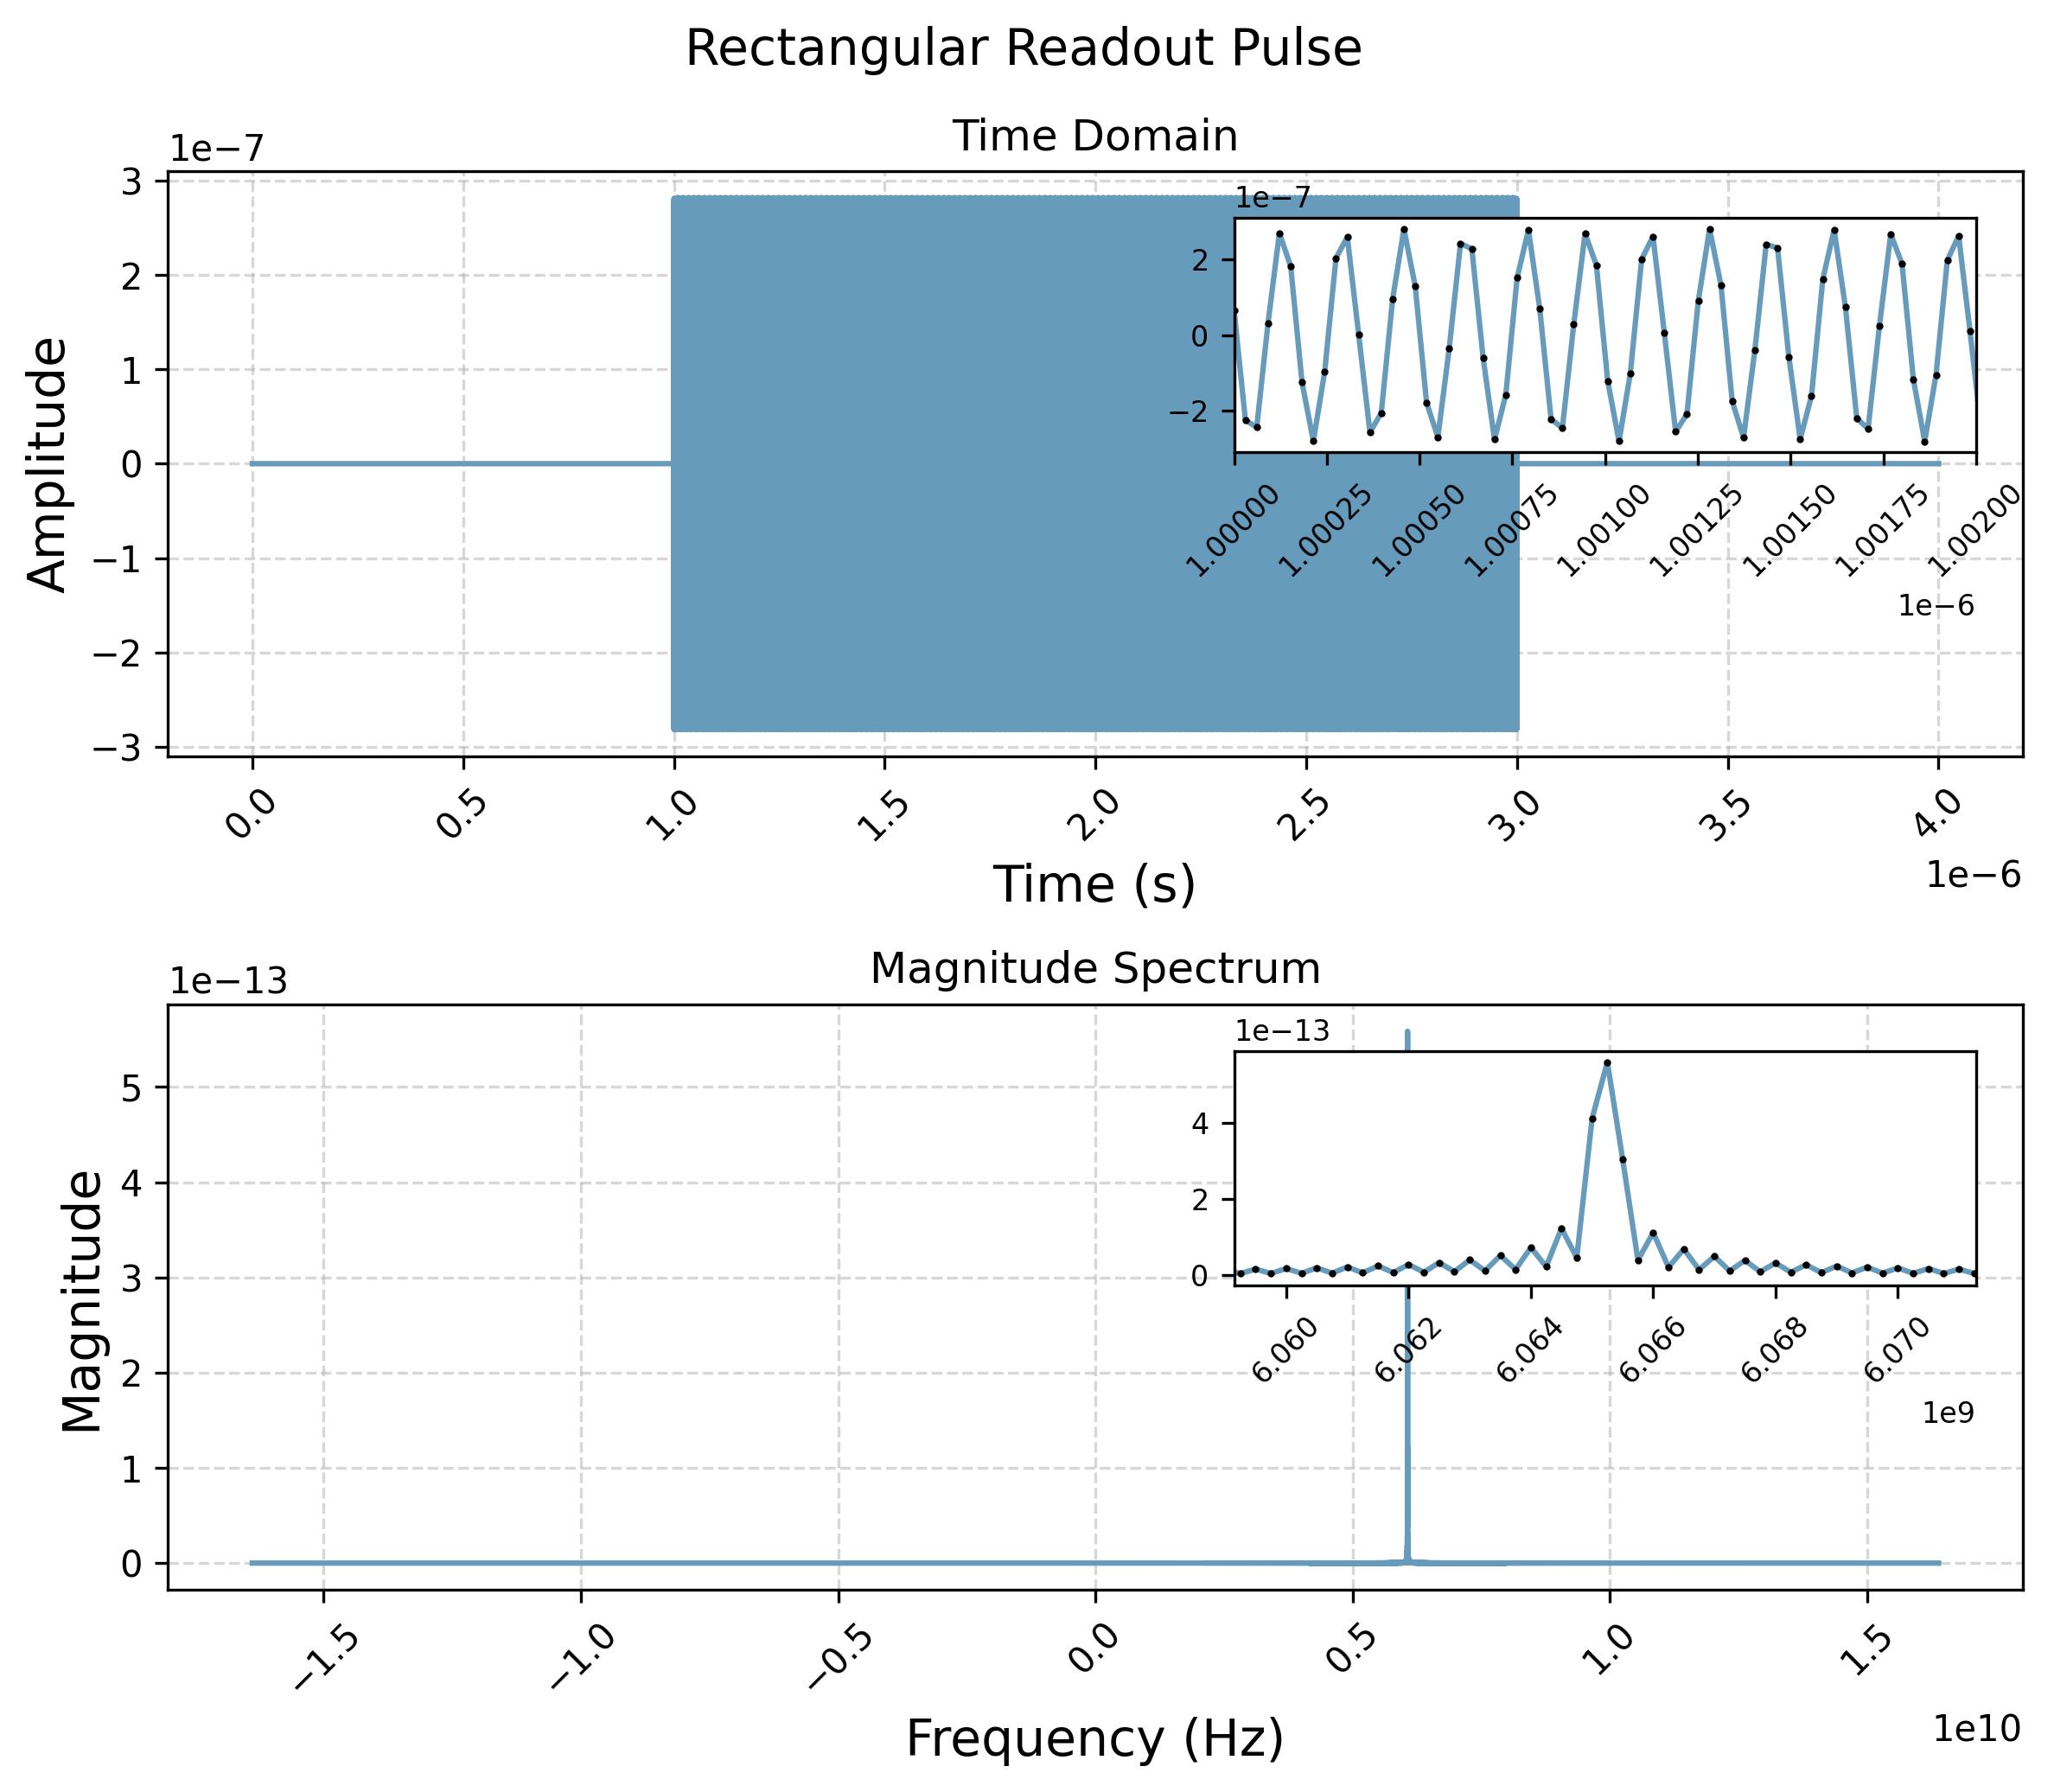

100%|██████████| 100/100 [00:00<00:00, 500.75it/s, Transited Pulse $|1\rangle$]


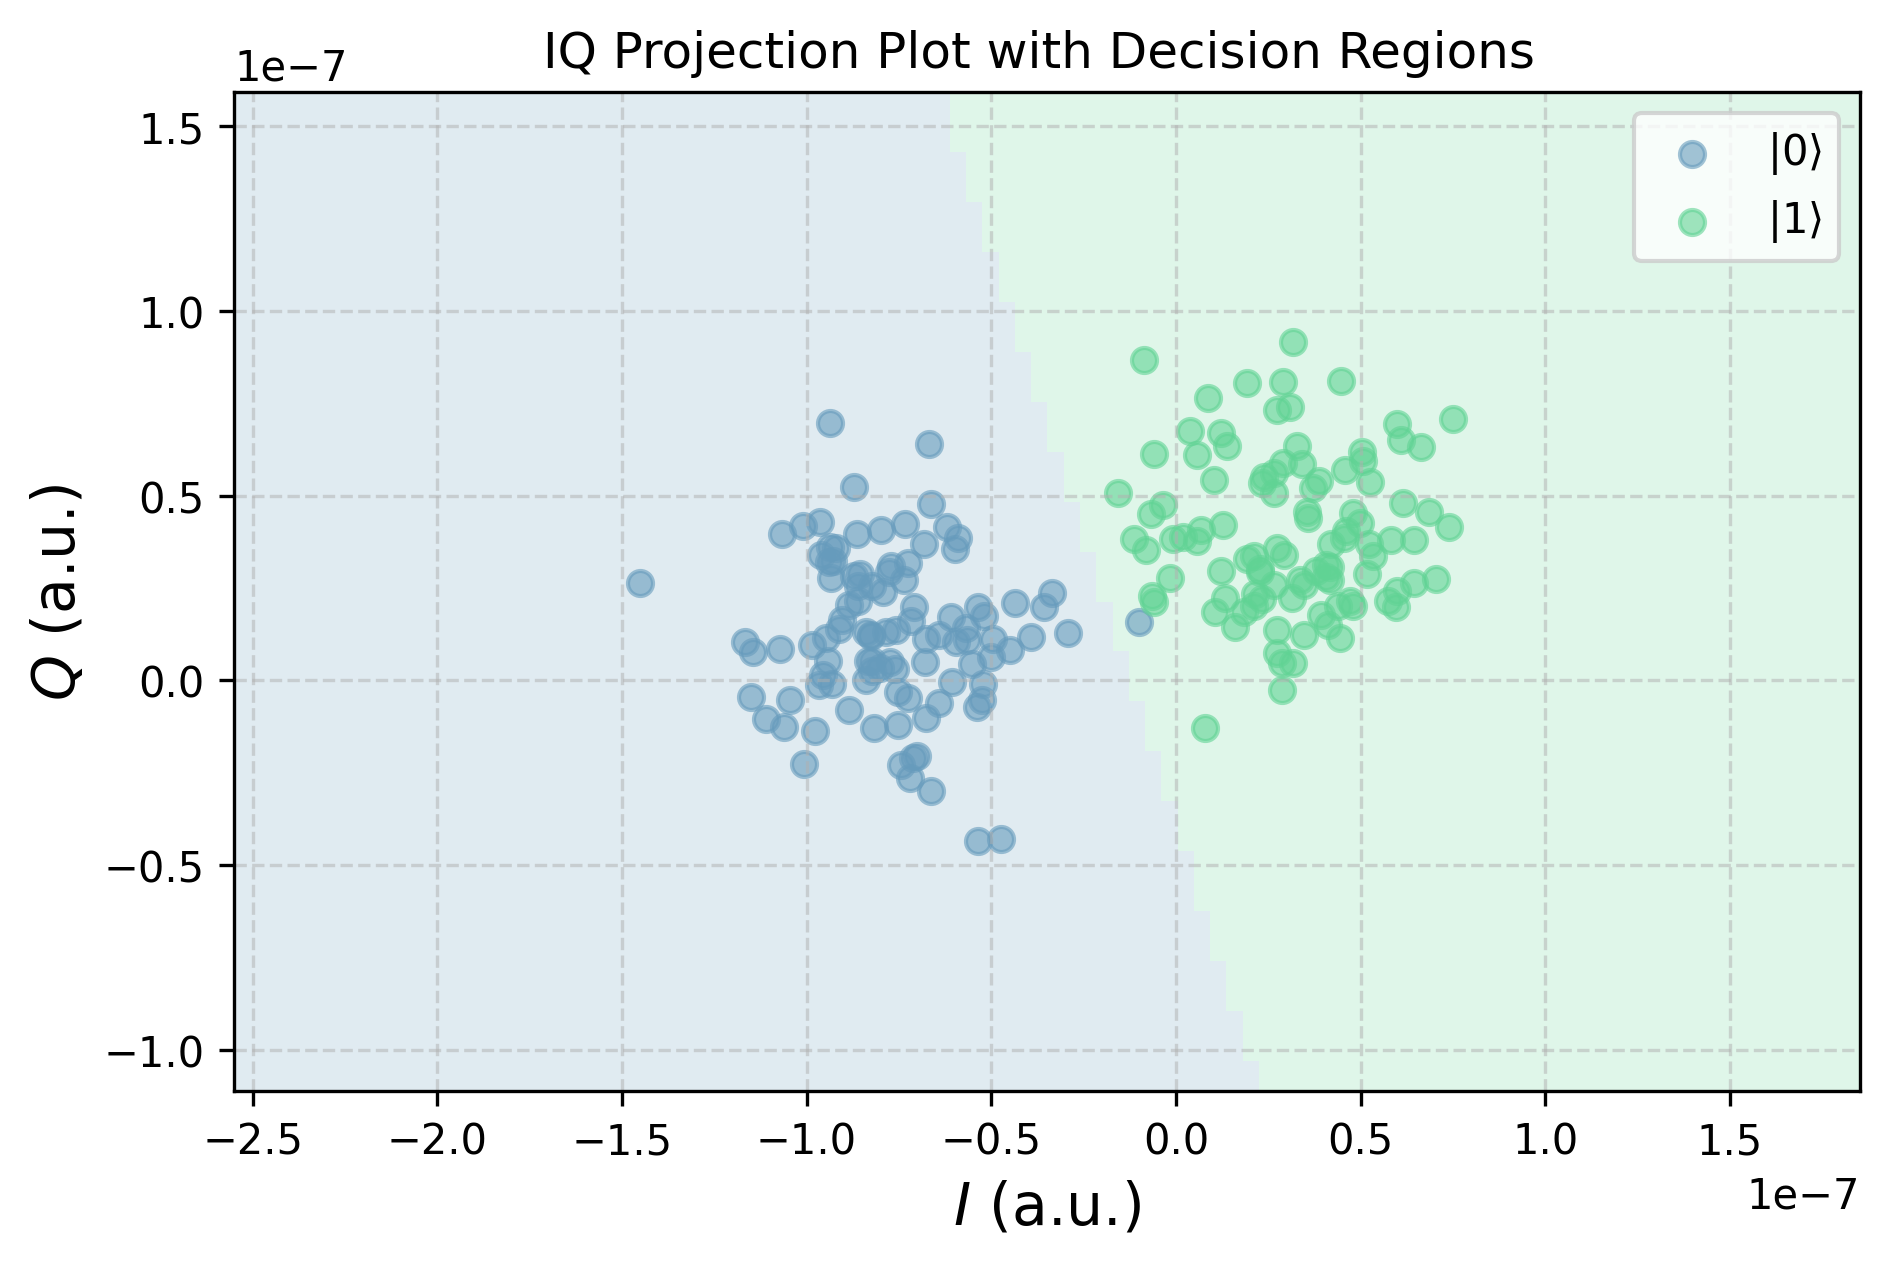

CPU times: user 1.95 s, sys: 267 ms, total: 2.21 s
Wall time: 3.11 s


0.995

In [25]:
%%time
run()

In [23]:
fr0_meas = 6.065852884
fr1_meas = 6.064931745
(fr0_meas+fr1_meas)/2-6.065212860

0.00017945450000045327